In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
import pandas as pd
import numpy as np
df = pd.read_excel("C:/Users/CWC/GEOsystems/BidAssist/Tenders/Rerun 3/35K EDA.xlsx")

In [3]:
df.head()

,Description,Authority,Stage,Contract Date,Contract Amount,City,Tender_ID,State,Categories,numeric_amount
0,Construction Of U/g Cement Concrete Np Two Pip...,Rural Development Department,AOC,9 Nov 2023,₹ 1 Lac,Yavatmal,2022_YAVAT_864176_1,Maharashtra,"Drainage Work, Construction Material",100000.0
1,Construction And Improvement To Nh 69 To Babul...,Public Works Department,AOC,9 Nov 2023,₹ 2.4 Cr,Nagpur,2023_PWR_926860_1,Maharashtra,"Road Construction, Highway Construction",24000000.0
2,Construction Of Sabhagruh Near Hanuman Mandir ...,Public Works Department,Financial Evaluation,9 Nov 2023,₹ 12.3 Lac,Akola,2022_PWR_836758_2,Maharashtra,"This is an estimated contract date, exact date...",1230000.0
3,Construction Of Sabhagruha For Pathorot Samaj ...,Public Works Department,Financial Evaluation,9 Nov 2023,₹ 12.3 Lac,Akola,2023_PWR_882045_5,Maharashtra,"This is an estimated contract date, exact date...",1230000.0
4,Construction Of Samajik Sabhagruha Near Balapu...,Public Works Department,Financial Evaluation,9 Nov 2023,₹ 12.3 Lac,Akola,2023_PWR_882045_6,Maharashtra,Networking Work,1230000.0


In [4]:
for column in df.columns:
    if " " in column:
        new_col = ("_").join(column.split())
        df.rename(columns={column:new_col.lower()}, inplace=True)
    else:
        df.rename(columns={column:column.lower()}, inplace=True)

In [5]:
df['contract_date'] = pd.to_datetime(df['contract_date'])
df['year'] = df['contract_date'].dt.year
df['month_name'] = df['contract_date'].dt.month_name().str[:3]
df['month_no'] = df['contract_date'].dt.month
df['quarter'] = df['contract_date'].dt.quarter
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35743 entries, 0 to 35742
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   description      35743 non-null  object        
 1   authority        35743 non-null  object        
 2   stage            35743 non-null  object        
 3   contract_date    35743 non-null  datetime64[ns]
 4   contract_amount  35743 non-null  object        
 5   city             35743 non-null  object        
 6   tender_id        35743 non-null  object        
 7   state            35743 non-null  object        
 8   categories       35743 non-null  object        
 9   numeric_amount   35743 non-null  float64       
 10  year             35743 non-null  int32         
 11  month_name       35743 non-null  object        
 12  month_no         35743 non-null  int32         
 13  quarter          35743 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int3

In [6]:
df.describe(include='all')

,description,authority,stage,contract_date,contract_amount,city,tender_id,state,categories,numeric_amount,year,month_name,month_no,quarter
count,35743,35743,35743,35743,35743,35743,35743,35743,35743,3.574300e+04,35743.000000,35743,35743.000000,35743.000000
unique,34059,175,7,NaN,2261,14,35735,8,3584,NaN,NaN,12,NaN,NaN
top,Custom Bid For Services,Rural Development Department,AOC,NaN,₹ 4.9 Lac,Nagpur,2022_NHAI_121714_1,Maharashtra,"Road Construction, Civil Works",NaN,NaN,Jul,NaN,NaN
freq,144,16604,24280,NaN,376,7505,3,33514,3400,NaN,NaN,5176,NaN,NaN
mean,NaN,NaN,NaN,2023-03-12 17:37:32.983800832,NaN,NaN,NaN,NaN,NaN,1.302683e+07,2022.648435,NaN,7.093976,2.724422
min,NaN,NaN,NaN,2022-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN,-9.999900e+04,2022.000000,NaN,1.000000,1.000000
25%,NaN,NaN,NaN,2022-11-03 00:00:00,NaN,NaN,NaN,NaN,NaN,5.700000e+05,2022.000000,NaN,5.000000,2.000000
50%,NaN,NaN,NaN,2023-03-15 00:00:00,NaN,NaN,NaN,NaN,NaN,1.610000e+06,2023.000000,NaN,8.000000,3.000000
75%,NaN,NaN,NaN,2023-07-22 00:00:00,NaN,NaN,NaN,NaN,NaN,4.390000e+06,2023.000000,NaN,9.000000,3.000000
max,NaN,NaN,NaN,2023-11-09 00:00:00,NaN,NaN,NaN,NaN,NaN,1.552300e+10,2023.000000,NaN,12.000000,4.000000


In [7]:
df[df['tender_id'] == '2022_NHAI_121714_1']

,description,authority,stage,contract_date,contract_amount,city,tender_id,state,categories,numeric_amount,year,month_name,month_no,quarter
18038,Appointment Of Safety Consultant For Operation...,National Highways Authority Of India,AOC,2023-03-11,₹ 1.5 Cr,Multi-City,2022_NHAI_121714_1,Maharashtra,"Other Equipments, Consultancy",15000000.0,2023,Mar,3,1
18042,Appointment Of Safety Consultant For Operation...,National Highways Authority Of India,AOC,2023-03-11,₹ 1.5 Cr,Multi-City,2022_NHAI_121714_1,Maharashtra,"Road Construction, Healthcare and Medicine, Ot...",15000000.0,2023,Mar,3,1
18056,Appointment Of Safety Consultant For Operation...,National Highways Authority Of India,AOC,2023-03-11,₹ 1.5 Cr,Multi-City,2022_NHAI_121714_1,Maharashtra,"Other Equipments, Consultancy",15000000.0,2023,Mar,3,1


In [8]:
mp_city = ['Chhindwara', 'Balaghat', 'Multi-City']
maha_df = df[~df['city'].isin(mp_city)].reset_index(drop=True).drop(columns='state')
maha_df.head()

,description,authority,stage,contract_date,contract_amount,city,tender_id,categories,numeric_amount,year,month_name,month_no,quarter
0,Construction Of U/g Cement Concrete Np Two Pip...,Rural Development Department,AOC,2023-11-09,₹ 1 Lac,Yavatmal,2022_YAVAT_864176_1,"Drainage Work, Construction Material",100000.0,2023,Nov,11,4
1,Construction And Improvement To Nh 69 To Babul...,Public Works Department,AOC,2023-11-09,₹ 2.4 Cr,Nagpur,2023_PWR_926860_1,"Road Construction, Highway Construction",24000000.0,2023,Nov,11,4
2,Construction Of Sabhagruh Near Hanuman Mandir ...,Public Works Department,Financial Evaluation,2023-11-09,₹ 12.3 Lac,Akola,2022_PWR_836758_2,"This is an estimated contract date, exact date...",1230000.0,2023,Nov,11,4
3,Construction Of Sabhagruha For Pathorot Samaj ...,Public Works Department,Financial Evaluation,2023-11-09,₹ 12.3 Lac,Akola,2023_PWR_882045_5,"This is an estimated contract date, exact date...",1230000.0,2023,Nov,11,4
4,Construction Of Samajik Sabhagruha Near Balapu...,Public Works Department,Financial Evaluation,2023-11-09,₹ 12.3 Lac,Akola,2023_PWR_882045_6,Networking Work,1230000.0,2023,Nov,11,4


In [9]:
def add_labels_on_hbars(ax, series, **kwargs):
    for index, value in enumerate(series):
        ax.text(value, index, str(value), ha='left', va='center', **kwargs)
        
def add_labels_on_vbars(ax, series, **kwargs):
    for index, value in enumerate(series):
        ax.text(index, value, str(value), ha='center', va='top', **kwargs)

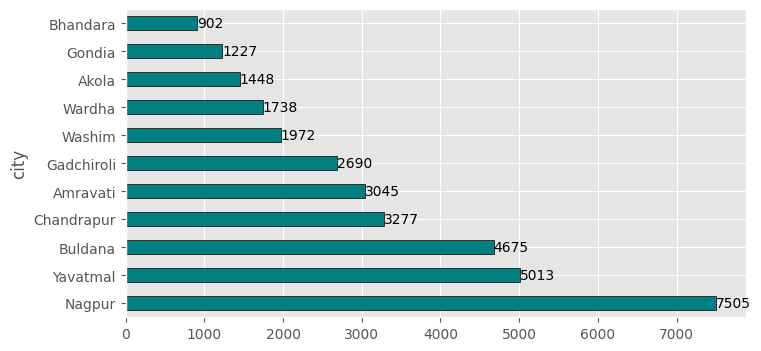

In [11]:
plt.figure(figsize=(8, 4))
ax = maha_df['city'].value_counts().plot(kind='barh', edgecolor='black', color='teal')
add_labels_on_hbars(ax, maha_df['city'].value_counts(), fontsize=10, color='black')
plt.show()

In [17]:
maha_indices_with_NA = maha_df[maha_df['numeric_amount'] == -99999].index
maha_notna_df = maha_df.drop(maha_indices_with_NA).reset_index(drop=True)

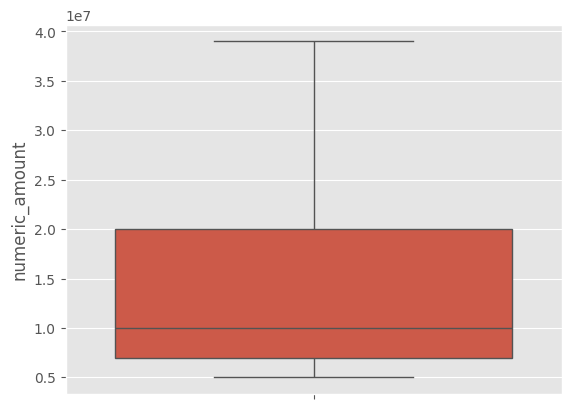

In [36]:
greater_than_50lac = maha_notna_df[maha_notna_df['numeric_amount'] >= 5e6].reset_index(drop=True)
sns.boxplot(greater_than_50lac['numeric_amount'], showfliers=False)
plt.show()

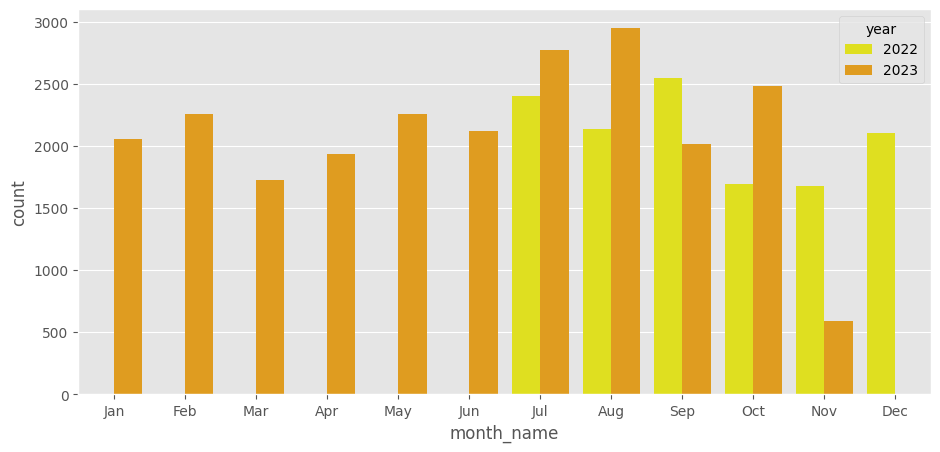

In [105]:
by_yr_month = df.groupby(['year', 'month_name', 'month_no'])['year'].count().reset_index(name='count').sort_values(by=['month_no'])
plt.figure(figsize=(11,5))
ax = sns.barplot(data=by_yr_month, x='month_name', y='count', hue='year', palette=['yellow', 'orange'])
plt.show()

In [82]:
data = df.groupby('city')['authority'].value_counts().reset_index()
pivot_data = data.pivot(columns='city', index='authority', values="count").reset_index()
cols_list = list(pivot_data.columns)[1:]
pivot_data[cols_list] = pivot_data[cols_list].fillna(0).astype(int)
pivot_data['Total'] = pivot_data[cols_list].sum(axis=1)
pivot_data = pivot_data.sort_values(by='Total', ascending=False)
pivot_data.head(5)

city,authority,Akola,Amravati,Balaghat,Bhandara,Buldana,Chandrapur,Chhindwara,Gadchiroli,Gondia,Multi-City,Nagpur,Wardha,Washim,Yavatmal,Total
146,Rural Development Department,527,998,0,391,2828,1388,1,1757,784,0,2532,778,1406,3214,16604
140,Public Works Department,265,576,139,98,841,488,159,340,175,0,1093,284,119,624,5201
42,Directorate Of Municipal Administration,243,504,0,106,661,284,0,352,101,0,855,281,264,527,4178
116,Municipal Corporation,214,488,0,0,1,163,0,1,0,0,1107,1,0,0,1975
172,Western Coalfields Limited,0,0,0,5,0,481,267,1,0,0,393,0,0,153,1300


,description,authority,stage,contract_date,contract_amount,city,tender_id,state,categories,numeric_amount,year,month_name,month_no,quarter
0,Construction Of U/g Cement Concrete Np Two Pip...,Rural Development Department,AOC,2023-11-09,₹ 1 Lac,Yavatmal,2022_YAVAT_864176_1,Maharashtra,"Drainage Work, Construction Material",100000.0,2023,Nov,11,4
1,Construction And Improvement To Nh 69 To Babul...,Public Works Department,AOC,2023-11-09,₹ 2.4 Cr,Nagpur,2023_PWR_926860_1,Maharashtra,"Road Construction, Highway Construction",24000000.0,2023,Nov,11,4
2,Construction Of Sabhagruh Near Hanuman Mandir ...,Public Works Department,Financial Evaluation,2023-11-09,₹ 12.3 Lac,Akola,2022_PWR_836758_2,Maharashtra,"This is an estimated contract date, exact date...",1230000.0,2023,Nov,11,4
3,Construction Of Sabhagruha For Pathorot Samaj ...,Public Works Department,Financial Evaluation,2023-11-09,₹ 12.3 Lac,Akola,2023_PWR_882045_5,Maharashtra,"This is an estimated contract date, exact date...",1230000.0,2023,Nov,11,4
4,Construction Of Samajik Sabhagruha Near Balapu...,Public Works Department,Financial Evaluation,2023-11-09,₹ 12.3 Lac,Akola,2023_PWR_882045_6,Maharashtra,Networking Work,1230000.0,2023,Nov,11,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35738,Beautification And Providing And Fixing Of Pav...,Directorate Of Municipal Administration,AOC,2022-07-01,₹ 21.3 Lac,Nagpur,2022_DMA_787473_1,Maharashtra,"Civil Works Others, Civil Works, Building Mate...",2130000.0,2022,Jul,7,3
35739,Construction Of Takali To Wakodi Road Vr 124 K...,Rural Development Department,AOC,2022-07-01,₹ 21.2 Lac,Nagpur,2021_NAGPU_733979_1,Maharashtra,"Road Construction, Civil Works",2120000.0,2022,Jul,7,3
35740,Under Jal Jeevan Mission 2021-22 Mouza Chichbh...,Rural Development Department,AOC,2022-07-01,₹ 21.2 Lac,Nagpur,2022_NAGPU_791781_1,Maharashtra,"Civil Works, Water Storage And Supply",2120000.0,2022,Jul,7,3
35741,Construction Of Pandhan Road Form Shri Balaji ...,Rural Development Department,AOC,2022-07-01,₹ 13.3 Lac,Nagpur,2022_YAVAT_809542_1,Maharashtra,"Civil And Construction, Road Construction",1330000.0,2022,Jul,7,3
